In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from decouple import GAN, ADCNDataModule
pathology = 'abeta'
gan = GAN.load_from_checkpoint(f'./decomposition-exp-{pathology}/last.ckpt')
gan.eval()
datamodule = ADCNDataModule(batch_size=1, num_workers=0, pathology=pathology, demo_mode=True)
datamodule.setup()

test_dataloader = datamodule.test_dataloader()
test_dataset = datamodule.test_data
val_dataset = datamodule.val_data
external_test_dataset = datamodule.external_test_data

pathology: abeta
AD: 918, CN: 1135
Patients: 1008 Train: 806 Val: 101 Test: 101
Counter({0: 510, 1: 498})
Scans: 2053 Train: 1649 Val: 193 Test: 211
[{'name': 'CN', 'value': 1135, 'children': [{'name': 'FBB (283)', 'value': 283, 'itemStyle': {'color': '#91cc75'}}, {'name': 'AV45 (828)', 'value': 828, 'itemStyle': {'color': '#91cc75'}}, {'name': 'PIB (24)', 'value': 24, 'itemStyle': {'color': '#91cc75'}}], 'itemStyle': {'color': '#91cc75'}}, {'name': 'AD', 'value': 918, 'children': [{'name': 'AV45 (713)', 'value': 713, 'itemStyle': {'color': 'purple'}}, {'name': 'FBB (92)', 'value': 92, 'itemStyle': {'color': 'purple'}}, {'name': 'PIB (113)', 'value': 113, 'itemStyle': {'color': 'purple'}}], 'itemStyle': {'color': 'purple'}}, {'name': 'NA', 'value': 1683, 'children': [{'name': 'AV45 (1306)', 'value': 1306, 'itemStyle': {'color': '#afafaf'}}, {'name': 'PIB (322)', 'value': 322, 'itemStyle': {'color': '#afafaf'}}, {'name': 'NAV4694 (55)', 'value': 55, 'itemStyle': {'color': '#afafaf'}}], 

In [4]:
from collections import defaultdict
import pandas as pd
from decouple_utils import collect_GAN_results
result = defaultdict(list)
result = collect_GAN_results(gan, val_dataset, result, 'Val', pathology)
result = collect_GAN_results(gan, test_dataset, result, 'Test', pathology)
result = collect_GAN_results(gan, external_test_dataset, result, 'External', pathology)
df = pd.DataFrame(result)

  0%|          | 0/10 [00:00<?, ?it/s]e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(
 10%|█         | 1/10 [00:12<01:51, 12.34s/it]e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(
 20%|██        | 2/10 [00:14<00:50,  6.30s

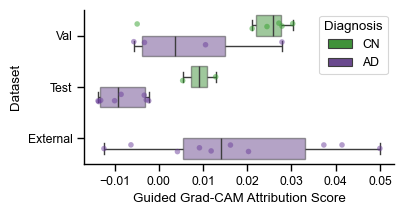

In [5]:
from decouple_utils import make_box_stripplot
color = {
    'CN': '#33a02c',
    'AD': '#6a3d9a'
}
fig, ax = make_box_stripplot(result, 'AD attribution', color, 'Guided Grad-CAM Attribution Score')

In [6]:
from decouple_utils import get_AD_CN_examples
decoupled_ads, decoupled_cns = get_AD_CN_examples(test_dataset, gan, 5)

found CN ..\abeta\datasets\adni-CN-all-time\nii\141_S_6240_I1329076_FBB.nii


e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


found CN ..\abeta\datasets\adni-CN-all-time\nii\141_S_6240_I998030_FBB.nii
found AD ..\abeta\datasets\adni-confirmed-ad-pet\nii\037_S_0150_I141409_PiB.nii
found AD ..\abeta\datasets\adni-confirmed-ad-pet\nii\037_S_0150_I256004_AV45.nii
found AD ..\abeta\datasets\adni-confirmed-ad-pet\nii\037_S_0150_I668853_AV45.nii
found AD ..\abeta\datasets\adni-confirmed-ad-pet\nii\037_S_0150_I69739_PiB.nii
found AD ..\abeta\datasets\adni-confirmed-ad-pet\nii\037_S_0150_I94710_PiB.nii


e:\projects\dev-multitracer\decouple_utils.py:394: UserWarning: Not enough images. Only found 5 AD and 2 CN images
  warnings.warn(


In [7]:
from pathlib import Path
from decouple_utils import save_decoupled_plots
for decoupled_ad in decoupled_ads:
    save_decoupled_plots(decoupled_ad, Path(f'./temp'), patho=pathology)

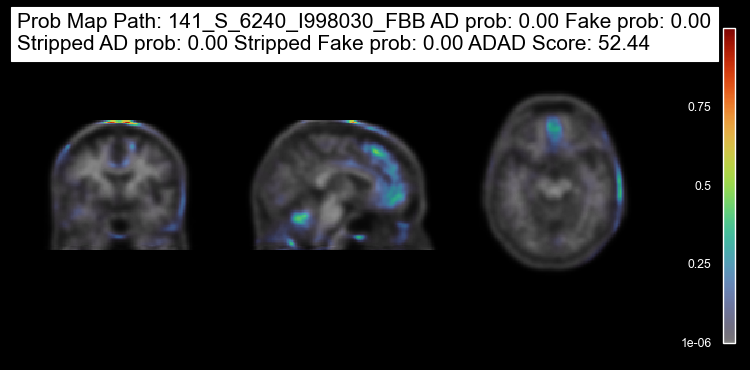

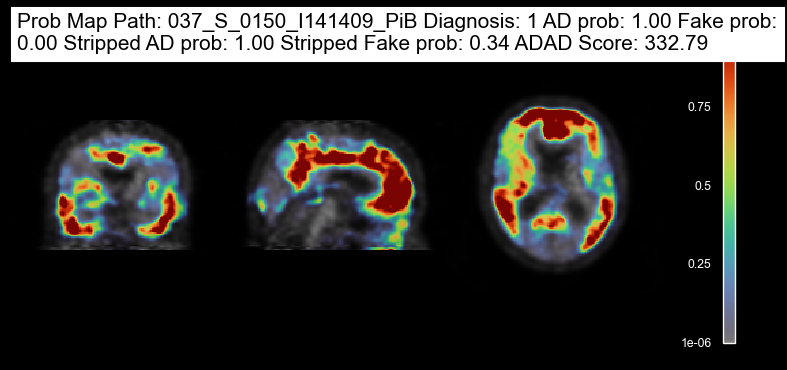

In [9]:
decoupled_cns[0].plot_prob_map()
decoupled_ads[0].plot_prob_map()

e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
e:\programs\Anaconda\envs\dlmed\lib\site-packages\captum\attr\_core\guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


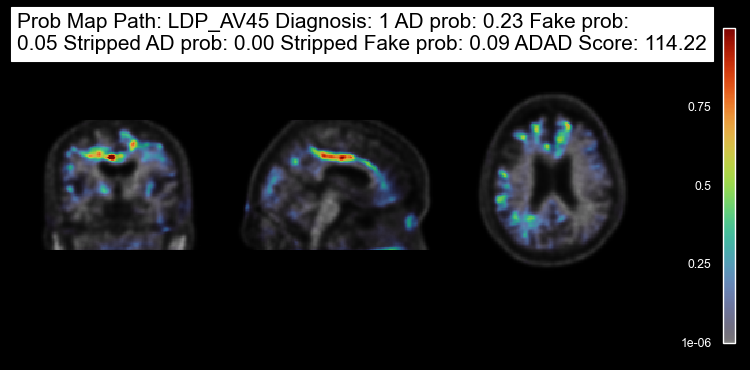

In [10]:
from decouple_utils import diagnose_decouple_raw_pet
if pathology == 'abeta':
    lcad_example = diagnose_decouple_raw_pet(gan, Path('./examples/LDP_AV45.nii'), 1)
    lcad_example.plot_prob_map()